<a href="https://colab.research.google.com/github/bunkorner/VR_Assignment2/blob/main/Assignment_2b_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import cv2
import os
import numpy as np
import pickle

In [117]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [118]:
srcPath = '/content/gdrive/MyDrive/CV/Assignment_2/CIFAR10/data_batch_1'

In [119]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [120]:
imgData = unpickle(srcPath)

In [121]:
imgFiles = []
for img in imgData[b'data']:
    r = img[:1024]
    g = img[1024:2048]
    b = img[2048:]
    r = r.reshape([32,32])
    g = g.reshape([32,32])
    b = b.reshape([32,32])
    merged = cv2.merge([b, g, r])
    imgFiles.append(merged)
imgFiles = np.asarray(imgFiles)

In [122]:
labels = imgData[b'labels']
filenames = imgData[b'filenames']

b'coupe_s_001735.png'
1


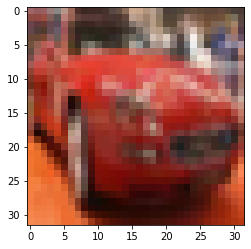

In [123]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(imgFiles[5], cv2.COLOR_BGR2RGB))
print(filenames[5])
print(labels[5])

In [124]:
from sklearn.cluster import KMeans
numberOfClusters=1000

In [125]:
descriptors = np.asarray([])
extractor = cv2.SIFT_create()
for img in imgFiles:
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    keypoints, desc = extractor.detectAndCompute(gray, None)
    if type(desc) == np.ndarray :
        if descriptors.shape[0] == 0:
            descriptors = desc
        else:
            descriptors = np.concatenate((descriptors, desc), axis=0)
kmeans = KMeans(n_clusters = numberOfClusters)

In [126]:
descriptors.shape

(129792, 128)

In [127]:
len(labels)

10000

In [128]:
descriptors.shape

(129792, 128)

In [129]:
kmeans.fit(descriptors)

KMeans(n_clusters=1000)

In [130]:
allBOVW = []
ext = cv2.xfeatures2d.SIFT_create()
for img in imgFiles:
  bovw = [0]*numberOfClusters
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  keypoints, descriptors = ext.detectAndCompute(gray, None)
  if type(descriptors) == np.ndarray:
      pred = kmeans.predict(descriptors)
      for ele in pred:
          bovw[ele] = bovw[ele] + 1
  allBOVW.append(bovw)

In [131]:
allBOVW = np.asarray(allBOVW)

In [132]:
allBOVW.shape

(10000, 1000)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
trainImgs,testImgs, trainLabels, testLabels = train_test_split(allBOVW, labels, 
                                                      train_size=0.7, random_state=0)

In [152]:
from sklearn.linear_model import LogisticRegression
LRegression = LogisticRegression().fit(trainImgs, trainLabels)

In [153]:
LRegression.score(testImgs,testLabels)

0.23766666666666666

In [154]:
from sklearn import svm
SVClassifier = svm.SVC(gamma=0.01,kernel='rbf')
SVClassifier.fit(trainImgs,trainLabels)

SVC(gamma=0.01)

In [155]:
SVClassifier.score(testImgs,testLabels)

0.259